# Spectra Stitch

Transform music to graphics

## 1. Load libraries

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm  # Import for FontProperties
import textwrap  # Required for text wrapping

## 2. Define functions

In [2]:

def load_audio(file_name):
    y, sr = librosa.load(file_name, sr=None)
    print("Length of sample: ", len(y))
    print("Sample rate: ", sr)
    return y, sr

def compute_dft_slices(y, sr, X_DIM, Y_DIM):
    n_slices = X_DIM * Y_DIM
    slice_len = len(y) // n_slices
    print("Length of slice: ", slice_len)
    slices = [y[i:i+slice_len] for i in range(0, slice_len * n_slices, slice_len)]
    print("Number of slices: ", len(slices))
    
    dft_slices = [np.abs(np.fft.fft(slice)) for slice in slices]
    print("Number of DFT slices: ", len(dft_slices))
    return dft_slices

def create_colormap(start_hex, end_hex):
    """Create a colormap from start to end HEX colors."""
    start_rgb = mcolors.hex2color(start_hex)
    end_rgb = mcolors.hex2color(end_hex)
    return mcolors.LinearSegmentedColormap.from_list("custom_colormap", [start_rgb, end_rgb], N=256)

def map_to_color(dft_slices, start_hex="#000000", end_hex="#FFFFFF"):
    """Map DFT slices to colors based on max frequency using a custom colormap."""
    max_frequencies = [np.argmax(slice) for slice in dft_slices]
    normalized_frequencies = np.array(max_frequencies) / max(max_frequencies)

    colormap = create_colormap(start_hex, end_hex)
    colors = colormap(normalized_frequencies)
    return colors


def reshape(colors, X_DIM, Y_DIM, Y_SCALE):
    # Initial reshape
    image = np.reshape(colors, (Y_DIM, X_DIM, 4))[:, :, :3]
    
    # Multiply the height of the image by repeating rows based on Y_SCALE
    new_image = []
    for row in image:
        for _ in range(Y_SCALE):
            new_image.append(row)
    return np.array(new_image)

def add_text_to_image(ax, image_dim, text=None, color='white', text_width_percent=30):
    """Adds specified text to the image at the center."""
    if text:
        # Calculate the center of the image
        center_x = image_dim[1] // 2
        center_y = image_dim[0] // 2
        # Estimate characters per line based on the percentage of image width
        chars_per_line = int(text_width_percent / 100 * image_dim[1])
        wrapped_text = '\n'.join(textwrap.wrap(text, width=chars_per_line))
        ax.text(center_x, center_y, wrapped_text, color=color, fontweight='bold', ha='center', va='center')


def main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, HEX_START, HEX_END, PDF_RESOLUTION, text=None, text_color='white', text_width_percent=80):
    # Use load_audio function to load music file
    y, sr = load_audio(MUSIC_FILE_NAME)
    dft_slices = compute_dft_slices(y, sr, X_DIM, Y_DIM)
    colors = map_to_color(dft_slices, HEX_START, HEX_END)
    # Plot image
    image = reshape(colors, X_DIM, Y_DIM, Y_SCALE)
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    # Add optional text overlay to the image
    image_dim = image.shape
    add_text_to_image(ax, image_dim, text, text_color, text_width_percent)
    # Save image to lossless pdf file, upscale to dpi
    plt.savefig(GRAPHICS_FILE_NAME, bbox_inches='tight', pad_inches=0, dpi=PDF_RESOLUTION)
    plt.show()
    

# import argparse
# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description="Generate graphics from music using DFT.")
#     parser.add_argument("MUSIC_FILE_NAME", type=str, help="Path to the music file.")
#     parser.add_argument("GRAPHICS_FILE_NAME", type=str, help="Path to save the generated graphics.")
#     parser.add_argument("X_DIM", type=int, help="Width of the generated image.")
#     parser.add_argument("Y_DIM", type=int, help="Height of the generated image.")
#     parser.add_argument("PDF_RESOLUTION", type=int, help="Resolution of the saved PDF.")
    
#     args = parser.parse_args()
    
#     main(args.MUSIC_FILE_NAME, args.GRAPHICS_FILE_NAME, args.X_DIM, args.Y_DIM, args.PDF_RESOLUTION)

## 3. Run on select samples

#### Perform DFT and store results

#### Perform graphical operations

Length of sample:  8919040
Sample rate:  44100
Length of slice:  111
Number of slices:  80000
Number of DFT slices:  80000


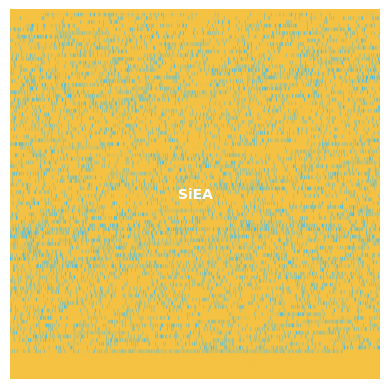

In [3]:
# Write code that uses above functions to create a spectrogram image from a music file
# Use the following parameters:
MUSIC_FILE_NAME = 'Samples/sample_1.mp3'
GRAPHICS_FILE_NAME = 'Outputs/sample_1_output_2.pdf'
X_DIM=800
Y_DIM=100
Y_SCALE=8
HEX_START='#f5c242'
HEX_END='#42bff5'
text = 'SiEA'
PDF_RESOLUTION=3000
# Run main function, pass file names under subfolers 'Samples' and 'Outputs'
main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, HEX_START, HEX_END, PDF_RESOLUTION, text, text_color='white', text_width_percent=80)


Length of sample:  8919040
Sample rate:  44100
Length of slice:  111
Number of slices:  80000
Number of DFT slices:  80000


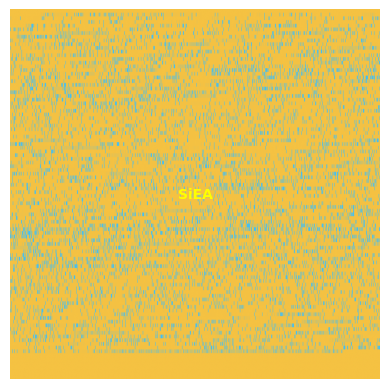

         1354525 function calls (1352481 primitive calls) in 73.695 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.324    1.324 3819289553.py:1(load_audio)
        1    0.041    0.041    0.041    0.041 3819289553.py:11(<listcomp>)
        1    0.718    0.718    2.348    2.348 3819289553.py:14(<listcomp>)
        1    0.000    0.000    0.000    0.000 3819289553.py:18(create_colormap)
        1    0.000    0.000    0.624    0.624 3819289553.py:24(map_to_color)
        1    0.065    0.065    0.590    0.590 3819289553.py:26(<listcomp>)
        1    0.001    0.001    0.016    0.016 3819289553.py:34(reshape)
        1    0.000    0.000    0.002    0.002 3819289553.py:45(add_text_to_image)
        1    0.006    0.006   73.667   73.667 3819289553.py:57(main)
        1    0.000    0.000    2.390    2.390 3819289553.py:7(compute_dft_slices)
        8    0.000    0.000    0.019    0.002 <__array_funct

In [4]:
import cProfile

cProfile.run('main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, HEX_START, HEX_END, PDF_RESOLUTION, text, text_color="yellow", text_width_percent=80)')
